### Install Dependencies

In [40]:
import pandas as pd, numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
#%matplotlib inline

### Convert CSV to Pandas DataFrame

In [41]:
#dfw - Dataframe for Weather Data
#Reading and showing head data
dfw = pd.read_csv("weather.csv",low_memory=False)
dfw.head()

,Unnamed: 0,airport,time,summary,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,...,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,ozone,precipType,precipAccumulation,time2
0,1,Highland,2019-11-30 00:00:00,Overcast,0,0,37,32,32,1,...,7,8,141,1,0,10,310,NaN,NaN,2019-11-30 00:00:00
1,2,Highland,2019-11-30 01:00:00,Possible Drizzle,0,0,38,33,32,1,...,6,8,110,1,0,10,309,rain,NaN,2019-11-30 01:00:00
2,3,Highland,2019-11-30 02:00:00,Possible Drizzle,0,1,38,31,32,1,...,8,9,112,1,0,10,309,rain,NaN,2019-11-30 02:00:00
3,4,Highland,2019-11-30 03:00:00,Light Rain,0,1,37,30,32,1,...,9,10,103,1,0,10,309,rain,NaN,2019-11-30 03:00:00
4,5,Highland,2019-11-30 04:00:00,Overcast,0,0,37,31,32,1,...,7,9,104,1,0,10,312,rain,NaN,2019-11-30 04:00:00


In [42]:
#dfw - Dataframe for Flight Data
#Reading and showing head data
dff = pd.read_csv("Flight_Delay_Data.csv",low_memory=False)
dff.head()

,Airline,Flight_Number,Plane_ID,FlightDate,Origin_Airport,Destination_Airport,Flight_Distance,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,Departure_Taxi,Departure_WheelsOff,Scheduled_Arrival_Time,Actual_Arrival_Time,Arrival_Delay_Minutes,Arrival_Taxi,Arrival_WheelsOn,Delay_Reason
0,TR,4135,GJLOAB,2019-12-01,IYF,HIX,678,1,103,62,15,118,127,219,52,7,212,LateAircraft
1,TR,3776,GDISCI,2019-12-01,HEN,HIX,1700,10,25,15,21,46,616,624,8,27,557,NaN
2,RO,4754,GHHWLL,2019-12-01,HIX,IZN,413,10,10,0,15,25,242,227,0,5,222,NaN
3,XM,5604,GBGWFC,2019-12-01,HIX,IZU,130,10,44,34,34,118,111,155,44,4,151,Weather
4,XM,5612,GBISBC,2019-12-01,HIX,LKF,258,10,234,144,26,300,132,358,146,6,352,Carrier


In [43]:
dff[['Arrival_Delay_Minutes','Departure_Delay_Minutes']].describe()

,Arrival_Delay_Minutes,Departure_Delay_Minutes
count,65669,65669
mean,326,16
std,19294,59
min,0,0
25%,0,0
50%,0,0
75%,10,7
max,2510000,2710


### Check if any features have NULL values and if so, the count of rows with Null values

In [44]:
dff.isna().sum() 
# No NULL values except the last column 'Delay_Reason' which has Nan values

Airline                         0
Flight_Number                   0
Plane_ID                        0
FlightDate                      0
Origin_Airport                  0
Destination_Airport             0
Flight_Distance                 0
Scheduled_Departure_Time        0
Actual_Departure_Time           0
Departure_Delay_Minutes         0
Departure_Taxi                  0
Departure_WheelsOff             0
Scheduled_Arrival_Time          0
Actual_Arrival_Time             0
Arrival_Delay_Minutes           0
Arrival_Taxi                    0
Arrival_WheelsOn                0
Delay_Reason                51588
dtype: int64

## Insights from Raw Data

In [45]:
#List of Origin Points
print("No of origins :: " + str(dff['Origin_Airport'].unique().size))
print("No of destinations :: " + str(dff['Destination_Airport'].unique().size))
#dff['Destination_Airport'].unique()

No of origins :: 170
No of destinations :: 169


In [46]:
flight_data_arrival_delay  = dff.groupby(['Destination_Airport']).agg({'Arrival_Delay_Minutes':[np.mean,np.size]}).sort_values(by=[('Arrival_Delay_Minutes','mean')], ascending=False)
flight_data_departure_delay  = dff.groupby(['Origin_Airport']).agg({'Departure_Delay_Minutes':[np.mean,np.size]}).sort_values(by=[('Departure_Delay_Minutes','mean')], ascending=False)
#flight_data_arrival_delay.head()
#flight_data_departure_delay.head()

In [47]:
#Origin Airports and Destination Airports which registered with higest and lowest arrival_delay
print("Destination with Highest arrival delays ::" + str(flight_data_arrival_delay.index[0]) 
      + " with average delay of " + str(round(flight_data_arrival_delay[('Arrival_Delay_Minutes','mean')].iloc[0],2)))
print("Destination with Lowest arrival delays :: " + str(flight_data_arrival_delay.index[-1]) 
      + " with average delay of " + str(round(flight_data_arrival_delay[('Arrival_Delay_Minutes','mean')].iloc[-1],2)))
print("Origin with Highest departure delays ::" + str(flight_data_departure_delay.index[0]) 
      + " with average delay of " + str(round(flight_data_departure_delay[('Departure_Delay_Minutes','mean')].iloc[0],2)))
print("Origin with Lowest departure delays :: " + str(flight_data_departure_delay.index[-1]) 
      + " with average delay of " + str(round(flight_data_departure_delay[('Departure_Delay_Minutes','mean')].iloc[-1],2)))

Destination with Highest arrival delays ::FKD with average delay of 52684.29
Destination with Lowest arrival delays :: LKN with average delay of 0.17
Origin with Highest departure delays ::FHN with average delay of 74.33
Origin with Lowest departure delays :: XLA with average delay of 1.14


Arrival_Delay_Minutes     
                                     mean size
Destination_Airport                           
HXA                                    20   14
UXL                                    18    2
LLH                                    12    8
XLA                                     9   11
LKN                                     0    6

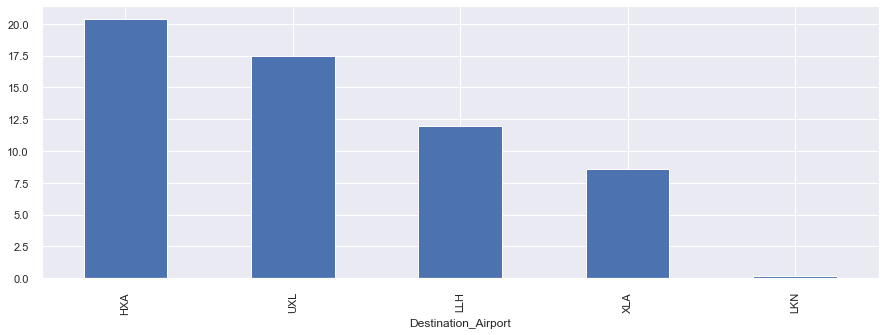

In [48]:
# Destination Airports where arrival flights have not been delayed (On an average)

flight_data_arrival_delay_15 = flight_data_arrival_delay[flight_data_arrival_delay[('Arrival_Delay_Minutes','size')]<15]
flight_data_arrival_delay_15[('Arrival_Delay_Minutes','mean')].plot(kind='bar',figsize=(15,5))
flight_data_arrival_delay_15

Departure_Delay_Minutes     
                                  mean size
Origin_Airport                             
MNZ                                 68    3
LLH                                 66   10
UXL                                 15    2
KEI                                 14   14
LKN                                 13    6
XLA                                  1   14

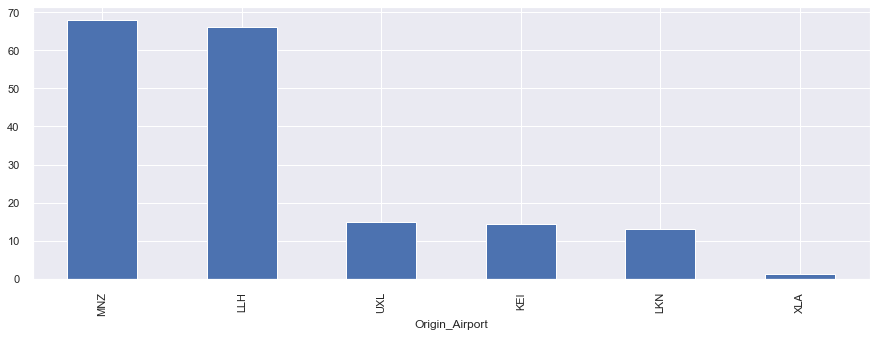

In [49]:
# Origin Airports where departing flights have not been delayed (On an average)

flight_data_departure_delay_15 = flight_data_departure_delay[flight_data_departure_delay[('Departure_Delay_Minutes','size')]<15]
flight_data_departure_delay_15[('Departure_Delay_Minutes','mean')].plot(kind='bar',figsize=(15,5))
flight_data_departure_delay_15

In [50]:
## Fast Flights VS Slow Flight
### Assuming total time spent = Arrival WheelOn + Departure WheelOff stages
# Speed in Miles Per Second

dff['Flight_Speed'] =  dff['Flight_Distance']/60*(dff['Departure_WheelsOff'] + dff['Arrival_WheelsOn'])
dff.head(5)

,Airline,Flight_Number,Plane_ID,FlightDate,Origin_Airport,Destination_Airport,Flight_Distance,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,Departure_Taxi,Departure_WheelsOff,Scheduled_Arrival_Time,Actual_Arrival_Time,Arrival_Delay_Minutes,Arrival_Taxi,Arrival_WheelsOn,Delay_Reason,Flight_Speed
0,TR,4135,GJLOAB,2019-12-01,IYF,HIX,678,1,103,62,15,118,127,219,52,7,212,LateAircraft,3729
1,TR,3776,GDISCI,2019-12-01,HEN,HIX,1700,10,25,15,21,46,616,624,8,27,557,NaN,17085
2,RO,4754,GHHWLL,2019-12-01,HIX,IZN,413,10,10,0,15,25,242,227,0,5,222,NaN,1700
3,XM,5604,GBGWFC,2019-12-01,HIX,IZU,130,10,44,34,34,118,111,155,44,4,151,Weather,583
4,XM,5612,GBISBC,2019-12-01,HIX,LKF,258,10,234,144,26,300,132,358,146,6,352,Carrier,2804


In [51]:
#grouping by based on the carrier by taking mean flight speed
Airline_Speed = dff.groupby('Airline').agg({'Flight_Speed':[np.mean,np.size]})
Airline_Speed

Flight_Speed      
                mean  size
Airline                   
CA             22787 10540
FH             18337 10640
GB             51693  1456
LV             23863   334
NR             47998 11925
RO             27074  2419
SN             17789  6014
TJ             85422   542
TO             16841  1782
TR             49057 10677
UG             40286   374
VF             24111    60
WC             31440  2177
XM             25748  2680
YJ             50303   423
ZH             21204  3626

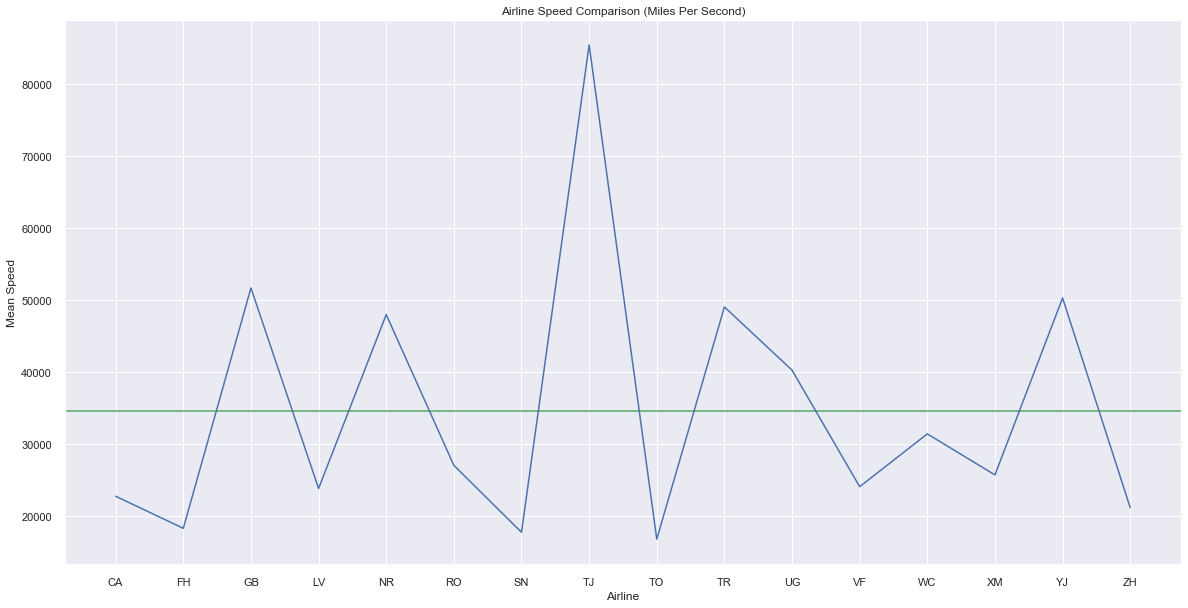

In [52]:
# Plotting graphs related to average flight speeds and average time saved
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace= 0.2, wspace= 0.2)
plt.xlabel ('Airline')
plt.ylabel ('Mean Speed')
plt.title ('Airline Speed Comparison (Miles Per Second)')
plt.axhline(y=Airline_Speed[('Flight_Speed','mean')].mean(),color = 'g')
plt.plot(Airline_Speed[('Flight_Speed','mean')], 'b')

In [53]:
print("Airline with highest speed recorded for December 2019 by the airline " + str(dff.at[dff['Flight_Speed'].idxmax(),'Airline']))
print("With flight speed of " + str(round(dff.at[dff['Flight_Speed'].idxmax(),'Flight_Speed'],2)) + " miles per second")


print("\nAirline with Lowest flight speed recorded for December 2019 by the airline " + str(dff.at[dff['Flight_Speed'].idxmin(),'Airline']))
print("With flight speed of " + str(round(dff.at[dff['Flight_Speed'].idxmin(),'Flight_Speed'],2)) + " miles per second")

print("\nAirline with Maximum mean speed recorded for  ::" + str(round(Airline_Speed['Flight_Speed','mean'].max(),2)) + "by the airline " + str(Airline_Speed['Flight_Speed','mean'].idxmax()))
print("Airline with minimum mean speed recorded for December 2019 ::" + str(round(Airline_Speed['Flight_Speed','mean'].min(),2)) + " by the airline " + str(Airline_Speed['Flight_Speed','mean'].idxmin()))


Airline with highest speed recorded for December 2019 by the airline TR
With flight speed of 279755.13 miles per second

Airline with Lowest flight speed recorded for December 2019 by the airline SN
With flight speed of 50.25 miles per second

Airline with Maximum mean speed recorded for  ::85421.89by the airline TJ
Airline with minimum mean speed recorded for December 2019 ::16840.94 by the airline TO


In [54]:
# Summary of Airline with maximum and minimum delays (both arrival + departure delays)
Airline_Delays_Chart  = dff.groupby(['Airline']).agg({'Arrival_Delay_Minutes':[np.mean],'Departure_Delay_Minutes':[np.mean,np.size]})
Airline_Delays_Chart["Mean_Total_Delays"] = Airline_Delays_Chart[('Arrival_Delay_Minutes','mean')] + Airline_Delays_Chart[('Departure_Delay_Minutes','mean')]
Airline_Delays_Chart= Airline_Delays_Chart.sort_values(by='Mean_Total_Delays', ascending=False)
Airline_Delays_Chart

Arrival_Delay_Minutes Departure_Delay_Minutes       Mean_Total_Delays
                         mean                    mean  size                  
Airline                                                                      
TJ                        903                      19   542               922
GB                        898                      12  1456               910
ZH                        837                      26  3626               863
CA                        520                      22 10540               542
XM                        460                      23  2680               483
FH                        282                      14 10640               296
TR                        281                      12 10677               294
RO                        209                      14  2419               222
NR                        179                      12 11925               191
WC                        158                      11  2177               169
SN                        133                      16  6014               149
VF                         41                      41    60                82
UG                         34                      33   374                67
TO                         25                      24  1782                49
YJ                         12                      14   423                26
LV                         10                      11   334                21

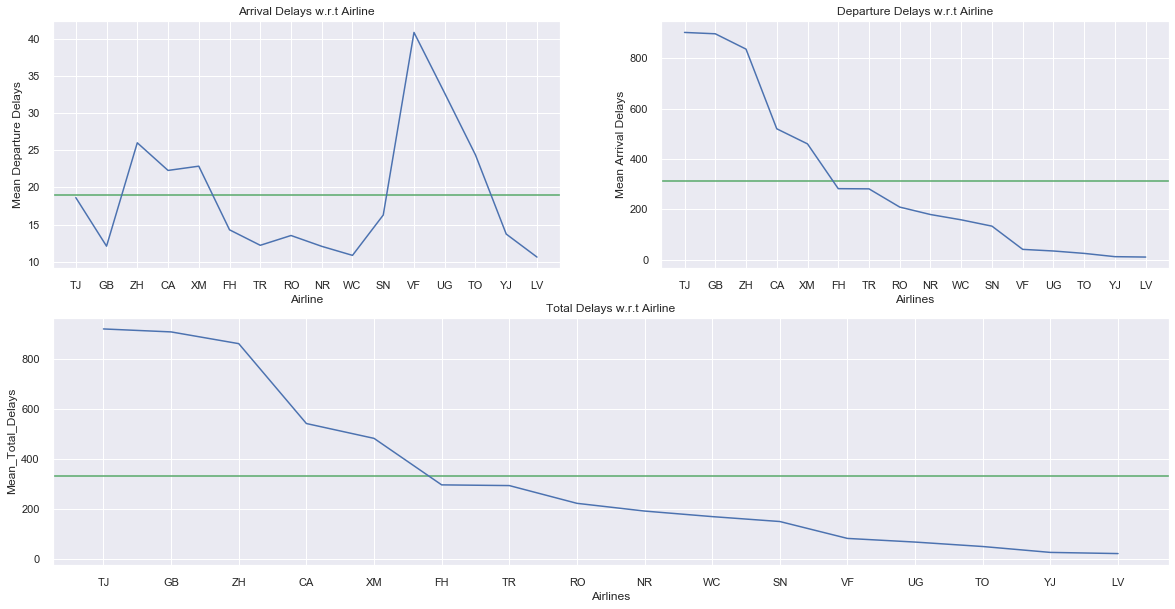

In [55]:
#Visulaisations of Airline based on the delay in arriavls, departures and sum of both
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace= 0.2, wspace= 0.2)
gs = gridspec.GridSpec(2, 2)
plt.subplot(gs[0, 0])
plt.xlabel ('Airline')
plt.ylabel ('Mean Departure Delays')
plt.title ('Arrival Delays w.r.t Airline')
plt.axhline(y=Airline_Delays_Chart[('Departure_Delay_Minutes','mean')].mean(),color = 'g')
plt.plot(Airline_Delays_Chart[('Departure_Delay_Minutes','mean')],'b')
plt.subplot(gs[0, 1])
plt.xlabel ('Airlines')
plt.ylabel ('Mean Arrival Delays')
plt.title ('Departure Delays w.r.t Airline')
plt.axhline(y=Airline_Delays_Chart[('Arrival_Delay_Minutes','mean')].mean(),color = 'g')
plt.plot(Airline_Delays_Chart[('Arrival_Delay_Minutes','mean')], 'b')
plt.subplot(gs[1, :])
plt.xlabel ('Airlines')
plt.ylabel ('Mean_Total_Delays')
plt.title ('Total Delays w.r.t Airline')
plt.axhline(y=Airline_Delays_Chart['Mean_Total_Delays'].mean(),color = 'g')
plt.plot(Airline_Delays_Chart['Mean_Total_Delays'], 'b')

plt.show()

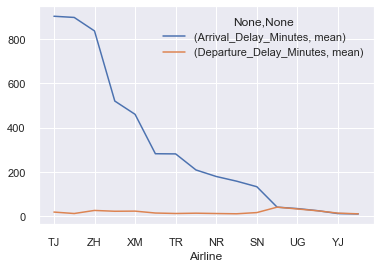

In [56]:
# Airlines facing delays at arrival VS departure
Airline_Delays_Chart.reset_index(inplace=True)
Airline_Delays_Chart.plot( x='Airline', y = [("Arrival_Delay_Minutes","mean"), ('Departure_Delay_Minutes','mean')])

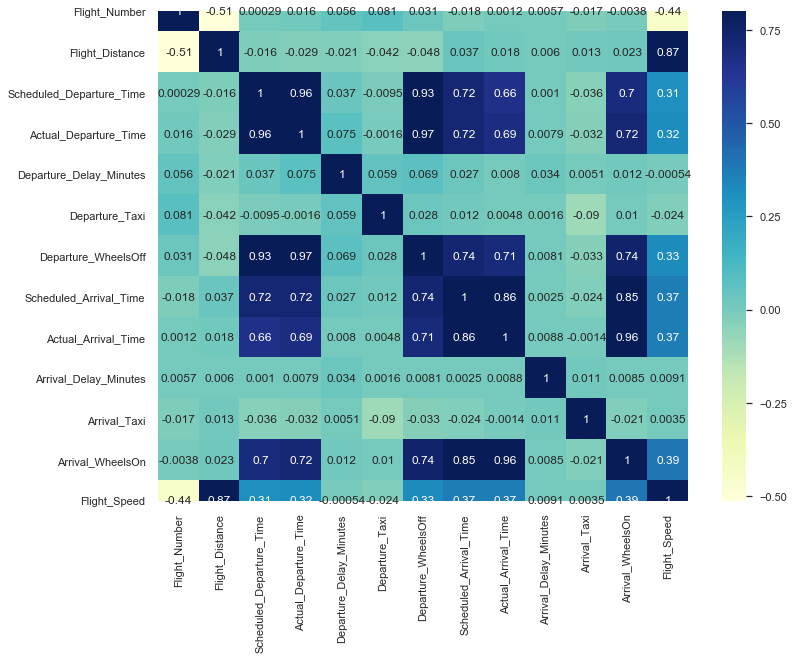

In [57]:
#Correlation matrix to figure out Multicollinearity using pearson coefficient values
# For pearson coefficient values over 0.5, indicates these features are corelated and we do not need them 
#as we want features to be independent
corrmat = dff.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True,  cmap="YlGnBu")
plt.show()

# Building a Prediction Model

In [58]:
dffnew = dff.copy()
dffnew['Delay_Flag'] = 1
dffnew.loc[dffnew['Delay_Reason'].isnull(),'Delay_Flag'] = 0
dffnew.head()

,Airline,Flight_Number,Plane_ID,FlightDate,Origin_Airport,Destination_Airport,Flight_Distance,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,Departure_Taxi,Departure_WheelsOff,Scheduled_Arrival_Time,Actual_Arrival_Time,Arrival_Delay_Minutes,Arrival_Taxi,Arrival_WheelsOn,Delay_Reason,Flight_Speed,Delay_Flag
0,TR,4135,GJLOAB,2019-12-01,IYF,HIX,678,1,103,62,15,118,127,219,52,7,212,LateAircraft,3729,1
1,TR,3776,GDISCI,2019-12-01,HEN,HIX,1700,10,25,15,21,46,616,624,8,27,557,NaN,17085,0
2,RO,4754,GHHWLL,2019-12-01,HIX,IZN,413,10,10,0,15,25,242,227,0,5,222,NaN,1700,0
3,XM,5604,GBGWFC,2019-12-01,HIX,IZU,130,10,44,34,34,118,111,155,44,4,151,Weather,583,1
4,XM,5612,GBISBC,2019-12-01,HIX,LKF,258,10,234,144,26,300,132,358,146,6,352,Carrier,2804,1


In [59]:
# The output shows that the DataFrame now includes only the columns that are relevant to the model, 
#Relevant Input Features:
#"Airline","Origin_Airport","Destination_Airport","Flight_Distance", "Scheduled_Departure_Time", "Actual_Departure_Time","Departure_Delay_Minutes","Departure_Taxi","Departure_WheelsOff","Scheduled_Arrival_Time","Delay_Flag"

#dffnew = dffnew[["Airline","Flight_Number","Plane_ID","FlightDate","Origin_Airport","Destination_Airport","Flight_Distance", "Scheduled_Departure_Time", "Actual_Departure_Time","Departure_Delay_Minutes","Departure_Taxi","Departure_WheelsOff","Scheduled_Arrival_Time","Actual_Arrival_Time","Arrival_Delay_Minutes","Arrival_Taxi", "Arrival_WheelsOn","Delay_Flag"]]
#dffnew = dffnew[["Airline","Origin_Airport","Destination_Airport","Flight_Distance", "Scheduled_Departure_Time", "Actual_Departure_Time","Departure_Delay_Minutes","Departure_Taxi","Departure_WheelsOff","Scheduled_Arrival_Time","Actual_Arrival_Time","Arrival_Delay_Minutes","Arrival_Taxi", "Arrival_WheelsOn","Delay_Flag"]]
dffnew = dffnew[["Airline","Origin_Airport","Destination_Airport","Flight_Distance", "Scheduled_Departure_Time", "Actual_Departure_Time","Departure_Delay_Minutes","Departure_Taxi","Departure_WheelsOff","Scheduled_Arrival_Time","Delay_Flag"]]
dffnew.head()
#dffnew[dffnew.isnull().values.any(axis=1)].head()

,Airline,Origin_Airport,Destination_Airport,Flight_Distance,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,Departure_Taxi,Departure_WheelsOff,Scheduled_Arrival_Time,Delay_Flag
0,TR,IYF,HIX,678,1,103,62,15,118,127,1
1,TR,HEN,HIX,1700,10,25,15,21,46,616,0
2,RO,HIX,IZN,413,10,10,0,15,25,242,0
3,XM,HIX,IZU,130,10,44,34,34,118,111,1
4,XM,HIX,LKF,258,10,234,144,26,300,132,1


In [60]:
# We have features - Airline, Origin_Airport, Destination_Airport containing string values 
# Convert them into flags while dropping the columns themselves as follows:
dffnew = pd.get_dummies(dffnew, columns=['Airline', 'Origin_Airport','Destination_Airport'])
dffnew.head()

,Flight_Distance,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,Departure_Taxi,Departure_WheelsOff,Scheduled_Arrival_Time,Delay_Flag,Airline_CA,Airline_FH,...,Destination_Airport_YJX,Destination_Airport_YNU,Destination_Airport_YRL,Destination_Airport_YRN,Destination_Airport_YTU,Destination_Airport_ZIL,Destination_Airport_ZIV,Destination_Airport_ZJI,Destination_Airport_ZJJ,Destination_Airport_ZVA
0,678,1,103,62,15,118,127,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1700,10,25,15,21,46,616,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,413,10,10,0,15,25,242,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,130,10,44,34,34,118,111,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,258,10,234,144,26,300,132,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
#Test Train Split
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(dffnew.drop('Delay_Flag', axis=1), dffnew['Delay_Flag'], test_size=0.2, random_state=42)

In [62]:
train_x.shape
#test_x.shape

(52535, 362)

In [63]:
# Model is going to be a binary classification model that predicts whether a flight will be delayed or not
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1110)
model.fit(train_x, train_y)

RandomForestClassifier(random_state=1110)

In [64]:
# Now call the predict method to test the model using the values in test_x, 
# followed by the score method to determine the mean accuracy of the model
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.9394700776610324

In [65]:
# generate a set of prediction probabilities from the test data:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)

In [66]:
# generate an ROC AUC score from the probabilities using scikit-learn's roc_auc_score method:
roc_auc_score(test_y, probabilities[:, 1])

0.9584524655577544

In [67]:
# produce a confusion matrix for your model:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[10140,   254],
       [  541,  2199]], dtype=int64)

In [68]:
# quantify the precision of your model
from sklearn.metrics import precision_score
train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

0.9998233371610282

In [69]:
# measure you model's recall, execute the following statements:
from sklearn.metrics import recall_score

recall_score(train_y, train_predictions)

0.9980601357904947

### Visualize Model

Text(0, 0.5, 'True Positive Rate')

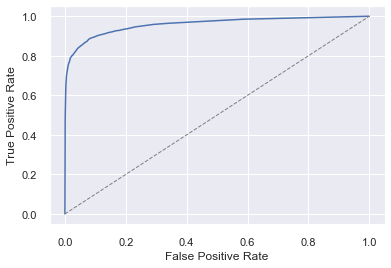

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_y, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [71]:
def predict_delay(Airline_CA, origin_HIX, destination_HIX):
    from datetime import datetime
    input = [{0}]*362
    input = [{'Airline_CA':1,'origin_HIX':1,'destination_HIX':0}]
    return model.predict_proba(pd.DataFrame(input))[0][0]

In [72]:
predict_delay(1,1,0)

ValueError: X has 3 features, but DecisionTreeClassifier is expecting 362 features as input.

## Next Steps Will be to Try out different models and Evaluate each to see which performs the best
## Further scope of analysis on Weather Data if more time was available
## Recommendations
